<h1>Declaração de Negócio</h1>

> Existe um site de vendas de carros na India chamado https://www.cars24.com. Foram extraídos 2 datasets via web scrapping para criação de modelo preditivo para prever o preço de venda do carro baseado nas informações contidas nos datasets.


In [1]:
# ↓↓ Bibliotecas de análise de dados Python
# ↓↓ Python Data Analytics Libraries

import numpy as np
import pandas as pd

# ↓↓ Bibliotecas de gráficos
# ↓↓ Graph Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl

# ↓↓ Biblioteca SciKit Learn
# ↓↓ SciKit Learn Library
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ↓↓ Biblioteca StatsModel
# ↓↓ StatsModel Library
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ↓↓ Oculte o máximo de avisos possível
# ↓↓ Hide many warnigs as possible
import warnings
warnings.filterwarnings("ignore")


In [2]:
# ↓↓ Reading training file data
# ↓↓ Lendo  os dados do arquivo de treino
dfPureCars = pd.read_csv("data/train.csv",header=0)

In [3]:
# ↓↓ Listing training dataset columns
# ↓↓ Listando as colunas do dataset de treino
dfPureCars.columns

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

In [4]:
# ↓↓ Listing training dataset
# ↓↓ Listando o dataset de treino
dfPureCars

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,6395,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,...,2,765000,NaN,good,2019-09-06T04:20:28.916,False,25550,165000,False,True
6395,6396,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,...,1,0,NaN,overpriced,2019-09-02T09:43:11.541,False,8594,55500,False,True
6396,6397,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,...,2,250000,NaN,overpriced,2019-08-28T14:42:16.246,False,9639,62250,False,False
6397,6398,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,...,2,33000,NaN,overpriced,2019-08-26T06:10:57.269,False,3484,22500,False,False


#Data Dictionary of Working CSV File
#Dicionário do Dados do Arquivo CSV de Trabalho

<table>
<thead>
<tr><th>Field(Campo)</th><th>Meaning (Significado)</th></tr>
</thead>
<tbody>
<tr><td>id</td><td>Unique ID for every car | ID único para cada carro</td></tr>
<tr><td>car_name</td><td>Name of a car | Nome de um carro</td></tr>
<tr><td>yr_mfr</td><td>Car manufactured year | Ano de fabricação do carro</td></tr>
<tr><td>fuel_type</td><td>Type of fuel car runs on | Tipo de combustível que o carro usa</td></tr>
<tr><td>kms_run</td><td>Number of kilometers run | Número de quilômetros percorridos</td></tr>
<tr><td>body_type</td><td>Car body type. Ex: Sedan, hatchback etc. | Tipo de carroceria do carro. Ex: Sedan, hatchback etc.</td></tr>
<tr><td>transmission</td><td>Type of transmission. Ex: Manual, Automatic | Tipo de transmissão. Ex: Manual, Automático</td></tr>
<tr><td>variant</td><td>Car variant | Variante de carro</td></tr>

<tr><td>make</td><td>Car manufacturing company | Empresa de fabricação de automóveis</td></tr>
<tr><td>model</td><td>Car model name | Nome do modelo do carro</td></tr>
<tr><td>is_hot</td><td>Is it a top selling car? Indicates the demand for a car. | É um carro mais vendido? Indica a demanda por um carro.</td></tr>
<tr><td>car_availability</td><td>Car availability status | Status de disponibilidade do carro</td></tr>
<tr><td>total_owners</td><td>How many owners have already owned it? | Quantos proprietários já o possuem?</td></tr>
<tr><td>car_rating</td><td>How good is the car to buy? | Quão bom é o carro para comprar?</td></tr>
<tr><td>fitness_certificate</td><td>Does the car have fitness certificate? | O carro tem certificado de aptidão física?</td></tr>
<tr><td>source</td><td>Method of selling a car | Método de venda de carro</td></tr>
<tr><td>registered_city</td><td>City where the car is registered | Cidade onde o carro está registrado</td></tr>
<tr><td>registered_state</td><td>State where the car is registered | Indique estado onde o carro está registrado</td></tr>

<tr><td>rto</td><td>Regional Transport Office where the car is registered | Escritório de Transporte Regional onde o carro está registrado</td></tr>
<tr><td>city</td><td>City where the car is being sold | Cidade onde o carro está sendo vendido</td></tr>
<tr><td>times_viewed</td><td>Number of times people have shown interest for the car | Número de vezes que as pessoas mostraram interesse pelo carro</td></tr>
<tr><td>assured_buy</td><td>Broker assured car | Corretor de carro assegurado</td></tr>
<tr><td>broker_quote</td><td>Price quoted for previous owner (in INR) | Preço cotado para o proprietário anterior (em INR)</td></tr>
<tr><td>original_price</td><td>Original price of a car (in INR) | Preço original de um carro (em INR)</td></tr>
<tr><td>emi_starts_from</td><td>Opting for EMI? Monthly EMI for the car starts from! (in INR) | Optando pela EMI? EMI mensal para o carro começa! (em INR)</td></tr>
<tr><td>booking_down_pymnt</td><td>Decided to buy? Please pay the down payment (in INR) | Decidiu comprar? Pague o adiantamento (em INR)</td></tr>
<tr><td>ad_created_on</td><td>Listed date for selling a car | Data listada para a venda de um carro</td></tr>
<tr><td>reserved</td><td>Car reserved status | Status de reserva do carro</td></tr>
<tr><td>warranty_avail</td><td>Warranty availability status | Status de disponibilidade de garantia</td></tr>
<tr><td>sale_price</td><td>Selling price of a car (in INR) | Preço de venda de um carro (em INR)</td></tr>

</tbody>
</table>



Pela experiência os campos 'id','car_availability','source','emi_starts_from','booking_down_pymnt','ad_created_on' e 'reserved' não influenciam no preço de venda do carro, vamos excluir estes campos.

From experience the fields 'id','car_availability','source','emi_starts_from','booking_down_pymnt','ad_created_on' and 'reserved' do not influence the sale price of the car, let's exclude these fields.

In [5]:
# ↓↓ Exclui um lista de campos que não influenciam no preço de venda do carro 
# ↓↓ Deletes a list of fields that do not influence the car's sales price
dfPureCars.drop(columns=['id','car_availability','source','emi_starts_from','booking_down_pymnt','ad_created_on','reserved'], inplace=True, axis=1) ; dfPureCars

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,is_hot,rto,make,model,total_owners,broker_quote,original_price,car_rating,fitness_certificate,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,True,dl6c,maruti,swift,2,397677,404177.0,great,True,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,True,up16,maruti,alto 800,1,272935,354313.0,great,True,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,True,up80,hyundai,grand i10,1,469605,NaN,great,True,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,True,dl1c,maruti,swift,1,294262,374326.0,great,True,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,True,dl12,hyundai,grand i10,1,360716,367216.0,great,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,False,up72,toyota,fortuner,2,765000,NaN,good,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,False,hr26,hyundai,i20,1,0,NaN,overpriced,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,False,up32,toyota,innova,2,250000,NaN,overpriced,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,False,up32,tata,indica ev2,2,33000,NaN,overpriced,False,False


In [6]:
# ↓↓ Verificando existência de valores ausentes
# ↓↓ Checking for missing values
dfPureCars.isna().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
make                      0
model                     0
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
fitness_certificate       8
warranty_avail            0
dtype: int64

* Para o campo original_price, temos 2824 valores ausentes neste campo. Vamos escolher excluir este campo (coluna) devido ter quase 50% valores ausentes do total de linhas de 6399.


In [7]:
# ↓↓ Excluindo Coluna Original Price
# ↓↓ Deleting Original Price Column
dfPureCars.drop(columns=['original_price'], inplace=True, axis=1) ; dfPureCars

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,registered_state,is_hot,rto,make,model,total_owners,broker_quote,car_rating,fitness_certificate,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,delhi,True,dl6c,maruti,swift,2,397677,great,True,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,uttar pradesh,True,up16,maruti,alto 800,1,272935,great,True,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,uttar pradesh,True,up80,hyundai,grand i10,1,469605,great,True,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,delhi,True,dl1c,maruti,swift,1,294262,great,True,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,delhi,True,dl12,hyundai,grand i10,1,360716,great,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,uttar pradesh,False,up72,toyota,fortuner,2,765000,good,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,haryana,False,hr26,hyundai,i20,1,0,overpriced,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,uttar pradesh,False,up32,toyota,innova,2,250000,overpriced,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,uttar pradesh,False,up32,tata,indica ev2,2,33000,overpriced,False,False


In [8]:
# ↓↓ Verificando novamente os valores ausentes
# ↓↓ Rechecking for missing values
dfPureCars.isna().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
make                     0
model                    0
total_owners             0
broker_quote             0
car_rating               7
fitness_certificate      8
warranty_avail           0
dtype: int64

* Para o campo body_type temos 90 linhas com valores ausentes. Podemos excluir estas 90 linhas devdido seu número e não ser um campo onde podemos colocar valores de média ou moda.
* Para o campo transmission temos 474 linhas com valroes ausentes e também podemos excluir estas devdido seu número e não ser um campo onde podemos colocar valores de média ou moda da informação.

* For the body_type field we have 90 lines with missing values. We can exclude these 90 lines due to their number and not be a field where we can put mean or mode values.
* For the transmission field, we have 474 lines with missing values and we can also exclude these due to their number and not be a field where we can place mean or mode values of the information.

In [9]:
# ↓↓ Excluindo das linhas com valores ausentes em body_type e transmission
# ↓↓ Excluding lines with missing values in body_type and transmission
dfPureCars = dfPureCars.dropna()

In [10]:
# ↓↓ Verificando novamente e agora sem valores ausentes em nenhuma coluna
# ↓↓ Checking again and now with no missing values in any column
dfPureCars.isna().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
make                   0
model                  0
total_owners           0
broker_quote           0
car_rating             0
fitness_certificate    0
warranty_avail         0
dtype: int64

In [11]:
dfPureCars.shape
# ↓↓ O dataframe agora possui 5.917 linhas e 22 colunas
# ↓↓ The dataframe now has 5,917 rows and 22 columns

(5917, 22)

In [132]:
dfPureCars.dtypes
# ↓↓ Listando os tipos de campos das colunas do dataframe
# ↓↓ Listing dataframe column field types

car_name                category
yr_mfr                     int64
fuel_type               category
kms_run                    int64
sale_price                 int64
city                    category
body_type               category
transmission            category
variant                 category
assured_buy             category
registered_city         category
registered_state        category
is_hot                  category
rto                     category
make                    category
model                   category
total_owners               int64
broker_quote               int64
sale_price_log           float64
car_name_cat               int16
fuel_type_cat               int8
city_cat                    int8
body_type_cat               int8
transmission_cat            int8
variant_cat                int16
assured_buy_cat             int8
registered_city_cat        int16
registered_state_cat        int8
is_hot_cat                  int8
rto_cat                    int16
make_cat  

In [12]:
dfPureCars.car_name.describe()
# ↓↓ Listar as estatísticas da coluna car_name

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# ↓↓ List car_name column statistics

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count             5917
unique             159
top       maruti swift
freq               472
Name: car_name, dtype: object

In [13]:
dfPureCars.fuel_type.describe()
# ↓↓ Listar as estatísticas da coluna fuel_type
# ↓↓ List fuel_type column statistics

count       5917
unique         5
top       petrol
freq        3702
Name: fuel_type, dtype: object

In [14]:
dfPureCars.fuel_type.unique()
# ↓↓ Lista os valores únicos da coluna fuel_type
# ↓↓ Lists the unique values of the fuel_type column

array(['petrol', 'diesel', 'petrol & cng', 'electric', 'petrol & lpg'],
      dtype=object)

In [15]:
dfPureCars.body_type.describe()
# ↓↓ List body_type column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count          5917
unique            5
top       hatchback
freq           3656
Name: body_type, dtype: object

In [16]:
dfPureCars.transmission.describe()
# ↓↓ Listar as estatísticas da coluna transmission
# ↓↓ List transmission column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count       5917
unique         2
top       manual
freq        5373
Name: transmission, dtype: object

In [17]:
dfPureCars.variant.describe()
# ↓↓ Listar as estatísticas da coluna variant
# ↓↓ List variant column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count     5917
unique     680
top        vxi
freq       570
Name: variant, dtype: object

In [18]:
dfPureCars.make.describe()
# ↓↓ Listar as estatísticas da coluna make
# ↓↓ List make column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count       5917
unique        24
top       maruti
freq        2603
Name: make, dtype: object

In [19]:
dfPureCars.model.describe()
# ↓↓ Listar as estatísticas da coluna model
# ↓↓ List model column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count      5917
unique      159
top       swift
freq        472
Name: model, dtype: object

In [20]:
dfPureCars.car_rating.describe()
# ↓↓ Listar as estatísticas da coluna car_rating
# ↓↓ List car_rating column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count      5917
unique        4
top       great
freq       4997
Name: car_rating, dtype: object

In [21]:
dfPureCars.car_rating.unique()
# ↓↓ Lista os valores únicos do campo car_rating
# ↓↓ Lists the unique values of the car_rating field

array(['great', 'good', 'fair', 'overpriced'], dtype=object)

In [22]:
dfPureCars.car_rating.value_counts()
# ↓↓ Lista as estatísticas dos valores da coluna car_rating
# ↓↓ Lists statistics for car_rating column values

great         4997
good           740
fair           111
overpriced      69
Name: car_rating, dtype: int64

In [23]:
# Como apenas menos de 1/4 dos dados possuem valor diferente de great, vamos retirar esta coluna.
dfPureCars.drop(columns=['car_rating'], inplace=True, axis=1)

In [24]:
dfPureCars

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,registered_city,registered_state,is_hot,rto,make,model,total_owners,broker_quote,fitness_certificate,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,delhi,delhi,True,dl6c,maruti,swift,2,397677,True,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,noida,uttar pradesh,True,up16,maruti,alto 800,1,272935,True,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,agra,uttar pradesh,True,up80,hyundai,grand i10,1,469605,True,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,delhi,delhi,True,dl1c,maruti,swift,1,294262,True,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,new delhi,delhi,True,dl12,hyundai,grand i10,1,360716,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,pratapgarh,uttar pradesh,False,up72,toyota,fortuner,2,765000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,gurgaon,haryana,False,hr26,hyundai,i20,1,0,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,lucknow,uttar pradesh,False,up32,toyota,innova,2,250000,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,lucknow,uttar pradesh,False,up32,tata,indica ev2,2,33000,False,False


In [25]:
dfPureCars.fitness_certificate.describe()
# ↓↓ Listar as estatísticas da coluna fitness_certificate
# ↓↓ List the fitness_certificate column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count     5917
unique       2
top       True
freq      5800
Name: fitness_certificate, dtype: object

In [26]:
# ↓↓ Como quase 100% dos valores são True, vamos remover esta coluna.
# ↓↓ Since almost 100% of the values are True, let's remove this column.
dfPureCars.drop(columns=['fitness_certificate'], inplace=True, axis=1)


In [27]:
dfPureCars.warranty_avail.describe()
# ↓↓ Listar as estatísticas da coluna warranty_avail

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

count      5917
unique        2
top       False
freq       5744
Name: warranty_avail, dtype: object

In [28]:
# ↓↓ Como quase 100% dos valores são False, vamos retirar esta coluna.
# ↓↓ Since almost 100% of the values are False, let's remove this column.
dfPureCars.drop(columns=['warranty_avail'], inplace=True, axis=1) 


In [29]:
dfPureCars

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,make,model,total_owners,broker_quote
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,maruti,swift,2,397677
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,maruti,alto 800,1,272935
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,hyundai,grand i10,1,469605
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,maruti,swift,1,294262
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,hyundai,grand i10,1,360716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,True,pratapgarh,uttar pradesh,False,up72,toyota,fortuner,2,765000
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,False,gurgaon,haryana,False,hr26,hyundai,i20,1,0
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,True,lucknow,uttar pradesh,False,up32,toyota,innova,2,250000
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,False,lucknow,uttar pradesh,False,up32,tata,indica ev2,2,33000


In [30]:
# ↓↓ Provavelmente este campo não influencia no valor de venda do carro! Dever ser tirado já no começo
# ↓↓ This field probably doesn't influence the car's sales value! It should be taken from the beginning
dfPureCars.drop(columns="times_viewed",inplace=True,axis=1)

In [31]:
dfPureCars.is_hot.value_counts()
# ↓↓ Listar as estatísticas da coluna is_hot
# ↓↓ List is_hot column statistics

# → count   => Total de linhas da coluna
# → unique  => Total de valores únicos da coluna
# → top     => Valor que mais aparece na coluna
# → freq    => Nº de vezes que o valor aparece na coluna

# → count => Total rows in column
# → unique => Total unique column values
# → top => Value that most appears in the column
# → freq => Number of times the value appears in the column

True     5454
False     463
Name: is_hot, dtype: int64

In [32]:
dfPureCars.shape
# ↓↓ O dataframe agora possui 5.917 linhas e 18 colunas
# ↓↓ The dataframe now has 5,917 rows and 18 columns

(5917, 18)

<AxesSubplot:>

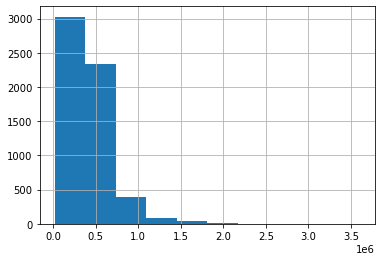

In [33]:
dfPureCars.sale_price.hist()
# ↓↓ Gerar um histograma da variável target (sale_price) sem qualquer tratamento
# ↓↓ Generate a histogram of the target variable (sale_price) without any treatment


In [34]:
# Aplicação de um regualização de Log na coluna target, gerando um outro coluna
# Applying a Log regularization on the target column, generating another column
dfPureCars['sale_price_log'] = np.log1p(dfPureCars['sale_price'])

<AxesSubplot:>

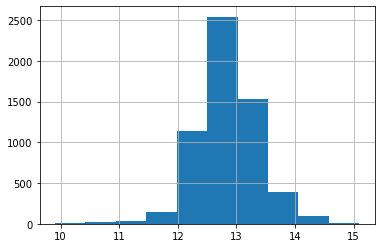

In [35]:
dfPureCars['sale_price_log'].hist()
# ↓↓ Gerar um histograma da variável target (sale_price) com aplicação de regularização de log
#  →→ Podermos ver como fivou parecido como uma distribuição normal ←←

# ↓↓ Generate a histogram of the target variable (sale_price) with application of log regularization
# →→ We can see how it looks like a normal distribution ←←

# Categorização das Colunas
# Column Categorization

In [36]:
dfPureCars.columns
# ↓↓ Lista as colunas do dataframe
# ↓↓ Lists dataframe columns

Index(['car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city',
       'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'registered_state', 'is_hot', 'rto', 'make', 'model',
       'total_owners', 'broker_quote', 'sale_price_log'],
      dtype='object')

In [37]:
dfPureCars.dtypes
# ↓↓ Lista os tipos de dados de cada coluna do dataframe
# ↓↓ Lists the data types of each column in the dataframe

car_name             object
yr_mfr                int64
fuel_type            object
kms_run               int64
sale_price            int64
city                 object
body_type            object
transmission         object
variant              object
assured_buy            bool
registered_city      object
registered_state     object
is_hot                 bool
rto                  object
make                 object
model                object
total_owners          int64
broker_quote          int64
sale_price_log      float64
dtype: object

In [38]:
# ↓↓ Transformando as colunas car_name, fuel_type, city, body_type, transmission, variant, assured_buy, registered_city, registered_state, is_hot, rto, make e model EM TIPOS CATEGÓRICOS, ISTO É, CLASSES.

# ↓↓ Transforming the car_name, fuel_type, city, body_type, transmission, variant, assured_buy, registered_city, registered_state, is_hot, rto, make, and model columns TO CATEGORICAL TYPES.

dfPureCars.car_name = dfPureCars.car_name.astype('category')
dfPureCars.fuel_type = dfPureCars.fuel_type.astype('category')
dfPureCars.city = dfPureCars.city.astype('category')
dfPureCars.body_type = dfPureCars.body_type.astype('category')
dfPureCars.transmission = dfPureCars.transmission.astype('category')
dfPureCars.variant = dfPureCars.variant.astype('category')
dfPureCars.assured_buy = dfPureCars.assured_buy.astype('category')
dfPureCars.registered_city = dfPureCars.registered_city.astype('category')
dfPureCars.registered_state = dfPureCars.registered_state.astype('category')
dfPureCars.is_hot = dfPureCars.is_hot.astype('category')
dfPureCars.rto = dfPureCars.rto.astype('category')
dfPureCars.make = dfPureCars.make.astype('category')
dfPureCars.model = dfPureCars.model.astype('category')



In [39]:
dfPureCars.dtypes
# ↓↓ Lista os tipos de dados de cada coluna do dataframe
# ↓↓ Lists the data types of each column in the dataframe

car_name            category
yr_mfr                 int64
fuel_type           category
kms_run                int64
sale_price             int64
city                category
body_type           category
transmission        category
variant             category
assured_buy         category
registered_city     category
registered_state    category
is_hot              category
rto                 category
make                category
model               category
total_owners           int64
broker_quote           int64
sale_price_log       float64
dtype: object

In [40]:
# ↓↓ Para Cada linha de cada coluna categorica, extrair para outra coluna o código da respectiva categoria daquela linha
# ↓↓ For each row of each categorical column, extract to another column the code of the respective category of that row

dfPureCars['car_name_cat'] = dfPureCars.car_name.cat.codes
dfPureCars['fuel_type_cat'] = dfPureCars.fuel_type.cat.codes
dfPureCars['city_cat'] = dfPureCars.city.cat.codes
dfPureCars['body_type_cat'] = dfPureCars.body_type.cat.codes
dfPureCars['transmission_cat'] = dfPureCars.transmission.cat.codes
dfPureCars['variant_cat'] = dfPureCars.variant.cat.codes
dfPureCars['assured_buy_cat'] = dfPureCars.assured_buy.cat.codes
dfPureCars['registered_city_cat'] = dfPureCars.registered_city.cat.codes
dfPureCars['registered_state_cat'] = dfPureCars.registered_state.cat.codes
dfPureCars['is_hot_cat'] = dfPureCars.is_hot.cat.codes
dfPureCars['rto_cat'] = dfPureCars.rto.cat.codes
dfPureCars['make_cat'] = dfPureCars.make.cat.codes
dfPureCars['model_cat'] = dfPureCars.model.cat.codes

In [41]:
# ↓↓ Lista coluna car_name e sua respectiva coluna com o código da categoria criada automática baseado nos seus valores únicos
# ↓↓ List car_name column and its respective column with auto created category code based on its unique values
dfPureCars[['car_name','car_name_cat']]

,car_name,car_name_cat
0,maruti swift,89
1,maruti alto 800,75
2,hyundai grand i10,44
3,maruti swift,89
4,hyundai grand i10,44
...,...,...
6394,toyota fortuner,148
6395,hyundai i20,46
6396,toyota innova,149
6397,tata indica ev2,129


In [42]:
# ↓↓ Lista todas as informações do dataframe
# ↓↓ List all dataframe information

dfPureCars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6398
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   car_name              5917 non-null   category
 1   yr_mfr                5917 non-null   int64   
 2   fuel_type             5917 non-null   category
 3   kms_run               5917 non-null   int64   
 4   sale_price            5917 non-null   int64   
 5   city                  5917 non-null   category
 6   body_type             5917 non-null   category
 7   transmission          5917 non-null   category
 8   variant               5917 non-null   category
 9   assured_buy           5917 non-null   category
 10  registered_city       5917 non-null   category
 11  registered_state      5917 non-null   category
 12  is_hot                5917 non-null   category
 13  rto                   5917 non-null   category
 14  make                  5917 non-null   category
 15  mode

In [43]:
# ↓↓ Criar um dataset apenas com valores numéricos e sem tratamento (normalizaçao) para utilizção nos modelos
# ↓↓ Create a dataset with only numeric values and no treatment (normalization) for use in models
X = dfPureCars[['car_name_cat','yr_mfr','fuel_type_cat','kms_run','city_cat','body_type_cat','transmission_cat','variant_cat','assured_buy_cat','registered_city_cat','registered_state_cat','is_hot_cat','rto_cat','make_cat','model_cat','total_owners','broker_quote']]


In [44]:
# ↓↓ Captura todos os valores da variável target (Alvo) para variável Y
# ↓↓ Captures all values from variable target to variable Y
Y = dfPureCars['sale_price'].values

In [45]:
X.head()
# ↓↓ Visualiza as variáveis independentes armazenadas em X
# ↓↓ View independent variables stored in X

,car_name_cat,yr_mfr,fuel_type_cat,kms_run,city_cat,body_type_cat,transmission_cat,variant_cat,assured_buy_cat,registered_city_cat,registered_state_cat,is_hot_cat,rto_cat,make_cat,model_cat,total_owners,broker_quote
0,89,2015,2,8063,11,0,1,416,1,58,3,1,36,12,131,2,397677
1,75,2016,2,23104,11,0,1,409,1,142,13,1,223,12,10,1,272935
2,44,2017,2,23402,11,0,1,491,1,1,13,1,237,7,66,1,469605
3,89,2013,0,39124,11,0,1,550,1,58,3,1,31,12,131,1,294262
4,44,2015,2,22116,11,0,1,427,0,140,3,1,28,7,66,1,360716


In [46]:
Y
# ↓↓ Visualiza os valores da variável dependente Y em formato de Array
# ↓↓ Displays dependent variable Y values in Array format

array([386399, 265499, 477699, ..., 415000, 150000, 350000], dtype=int64)

In [47]:
# ↓↓ Adicona os valores da variável target no objeto StasModel
# ↓↓ Add the target variable values to the StatsModel object
Xc = sm.add_constant(Y)
# ↓↓ Cria um modelo de regressão linear com StatsModel
# ↓↓ Create a linear regression model with StatsModel
modelo = sm.OLS(Y,Xc)
# ↓↓ Executa o modelo para aprender a relação do variável Target Y (sale_price) e as variáveis independentes de X
# ↓↓ Run the model to learn the relationship of the Target variable Y (sale_price) and the independent variables of X
modelo_V1 = modelo.fit()

In [48]:
modelo_V1.summary()
# ↓↓ Lista as informações estatísticas do modelo de Regressão Linear do StatsModel para os dados de X E Y
# ↓↓ Lists the StatsModel Linear Regression model statistical information for X and Y data

# →→ R-squared:	1.000 sigfica que as variáveis independentes X explicam 100% da variável dependente ou target Y 
# ➔ Como isto é muito suspeito, vamos fazer uma nova seleção de variáveis.

# →→ R-squared: 1.000 means that the independent variables X explain 100% of the dependent variable or target Y
# ➔ As this is very suspicious, let's make a new selection of variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.208e+34
Date:                Fri, 16 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:07:33   Log-Likelihood:             1.2963e+05
No. Observations:                5917   AIC:                        -2.592e+05
Df Residuals:                    5915   BIC:                        -2.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.185e-11   1.89e-12     38.086      0.000    6.82e-11    7.55e-11
x1             1.0000   3.72e-18   2.68e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                      375.892   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.544
Skew:                          -0.630   Prob(JB):                    4.42e-100
Kurtosis:                       3.519   Cond. No.                     9.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# ↓↓ Gerar a matriz de corretação entre as variávies independentes
# ↓↓ Generate the correction matrix between the independent variables
matriz_corr = X.corr()


In [50]:
# ↓↓ Criar um função para gerar um Plot do Tipo HeatMap Correlation Map mostrando o grau de correlação entre as variáveis independentes
# ↓↓ Create a function to generate a Plot of Type HeatMap Correlation Map showing the degree of correlation between independent variables
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

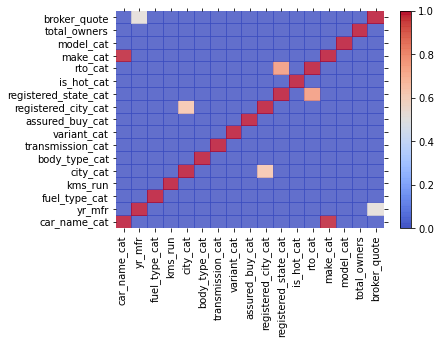

In [51]:
variables = X.columns ; variables
visualize_correlation_matrix(X, hurdle = 0.5)
# ↓↓ Executa a função mostra o gráfico de correlação
# Vemos claramente que Make_Cat e Car_Name_Cat tem altússima correlação e podemos até eliminar uma delas.
# Vemos claramente que rto_cat tem alta correlação com registered_state_cat e podemos até eliminar uma delas.
# Vemos claramente que registered_city_cat tem city_cat e podemos até eliminar uma delas.

# ↓↓ Execute the function shows the correlation graph
# We clearly see that Make_Cat and Car_Name_Cat have very high correlation and we can even eliminate one of them.
# We clearly see that rto_cat has a high correlation with registered_state_cat and we can even drop one of them.
# We clearly see that registered_city_cat has city_cat and we can even drop one of them.


# Importância dos Atributos
# Importance of Attributes

In [52]:
# ↓↓ Cria um modelo de regressão liner do SciKit Learn, sem normalizar os dados
# ↓↓ Creates a SciKit Learn liner regression model without normalizing the data
LnrRgrModel = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [53]:
# ↓↓ Executar modelo com os dados independentes X e a variável dependente Y
# ↓↓ Run model with independent data X and dependent variable Y
LnrRgrModel.fit(X,Y)

LinearRegression()

In [54]:
# ↓↓ Imprimindo os coeficientes de importância de cada variável independente em relação a variável target. Valores maiores são melhores.
# ↓↓ Printing the importance coefficients of each independent variable in relation to the target variable. Larger values are better.
for coef, var in sorted(zip(map(abs, LnrRgrModel.coef_), X.columns), reverse = True):
    print ("%6.3f %s" % (coef,var))

109567.468 is_hot_cat
24205.584 transmission_cat
19181.001 make_cat
8212.436 fuel_type_cat
3203.401 total_owners
3053.379 yr_mfr
2637.571 car_name_cat
2173.279 body_type_cat
1907.967 registered_state_cat
1309.898 assured_buy_cat
1128.599 city_cat
320.496 model_cat
73.697 rto_cat
29.024 variant_cat
11.265 registered_city_cat
 0.911 broker_quote
 0.041 kms_run


# Normalizando para Rever a Importancia dos Atributos
# Normalizing to Review Importance of Attributes

In [55]:
# ↓↓ Aplicação de padronização, isto é, colocá-los em mesma escala, para verificar se a importância de cada fica a mesma
# ↓↓ Application of standardization, that is, putting them on the same scale, to verify that the importance of each remains the same
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, LnrRgrModel)

In [56]:
# ↓↓ Treinamento do modelo com dados padronizados, isto é na mesma escala.
# ↓↓ Model training with standardized data, ie on the same scale.
Stand_coef_linear_reg.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [57]:
# ↓↓ Imprimindo as variáveis e seus respectivos coeficientes de importância usando dados normalizados
# ↓↓ Printing the variables and their respective importance coefficients using normalized data
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), X.columns), reverse = True):
    print ("%6.3f %s" % (coef,var))

240959.587 broker_quote
93243.583 car_name_cat
89694.089 make_cat
29425.789 is_hot_cat
15308.791 model_cat
9099.958 yr_mfr
8280.478 fuel_type_cat
6993.940 transmission_cat
5994.509 registered_state_cat
5104.410 variant_cat
4640.907 city_cat
4440.130 rto_cat
3525.711 body_type_cat
1862.577 total_owners
1688.314 kms_run
582.071 registered_city_cat
493.805 assured_buy_cat


In [ ]:
# ↑↑ Percebemos que a importância de algumas variáveis mudou muito após a padronização e vamos levar em consideração este ranking de importância para o modelo preditivo.

# ↑↑ We realized that the importance of some variables changed a lot after standardization and we will take into account this ranking of importance for the predictive model.

## Usando R squared
## Using R squared

In [58]:
# ↓↓ Criando um  modelo de regressão linear para avaliação do nível de erro do modelo
# ↓↓ Creating a linear regression model to assess the model's level of error
modeloR2 = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [59]:
# ↓↓ Criando um função para avaliar o nível de erro do modelo pelo parâmetro R2 (Erro Médio ao Quadrado)
# ↓↓ Creating a function to evaluate the model's error level by parameter R2 (Mean Squared Error)
def r2_est(X,y):
    return r2_score(Y, modeloR2.fit(X,Y).predict(X))

In [60]:
# ↓↓ Executando a Função e extraindo o score de erro do modelo
# ↓↓ Running the Function and extracting the model error score
print ('Coeficiente R2: %0.3f' %  r2_est(X,Y))

Coeficiente R2: 0.935


In [ ]:
# ↑↑ Pelo coeficiente R2 de valor 0.935, o modelo explica 94% da correlação das variáveis independente para variável target!
# ↑↑ By the R2 coefficient of value 0.935, the model explains 94% of the correlation of the independent variables to the target variable!

In [61]:
# ↓↓ Trabalhando apenas om as features mais importantes segundo o coeficiente de importância baseado em dados normalizados
# ↓↓ Working only with the most important features according to the importance coefficient based on normalized data
X1 = dfPureCars[['car_name_cat','make_cat','is_hot_cat','model_cat','yr_mfr','fuel_type_cat','broker_quote']]

In [63]:
# ↓↓ Aplicação de padronização, isto é, colocá-los em mesma escala, para verificar se a importância de cada fica a mesma
# ↓↓ Application of standardization, that is, putting them on the same scale, to verify that the importance of each remains the same
Stand_coef_linear_reg_Final = make_pipeline(standardization, modeloR2_V2)
Stand_coef_linear_reg_Final.fit(X1, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [64]:
# ↓↓ Criando uma função para testar o modelo com dados normalizados e obter o coeficiente de erro médio ao quadrado
# ↓↓ Creating a function to test the model with normalized data and get the mean squared error coefficient
def r2_est_final(X,y):
    return r2_score(Y, Stand_coef_linear_reg_Final.fit(X,y).predict(X))

In [67]:
print ('Coeficiente R2: %0.3f' %  r2_est_final(X1,Y))

Coeficiente R2: 0.934


# Testando Modelo Criado com Dados de Teste
# Testing Model Created with Test Data

In [94]:
# ↓↓ Lendo dos dados de teste do arquivo CSV
# ↓↓ Reading test data from CSV file
df_Ind_Cars_Tst = pd.read_csv("data/test.csv",header=0)

In [93]:
# ↓↓ Visualizando os dados
# ↓↓ Viewing data
df_Ind_Cars_Tst.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [96]:
# ↓↓ Listando as colunas do dataFrame de dados de teste
# ↓↓ Listing the Test Data DataFrame Columns
df_Ind_Cars_Tst.columns

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

In [97]:
# ↓↓ Excluindo as mesmas colunas que foram excluídas da arquivo de treinamento
# ↓↓ Deleting the same columns that were deleted from the training file
df_Ind_Cars_Tst.drop(columns=['id','car_availability','source','emi_starts_from','booking_down_pymnt','ad_created_on','reserved','car_rating','fitness_certificate','warranty_avail','times_viewed'], inplace=True, axis=1) ; df_Ind_Cars_Tst

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,make,model,total_owners,broker_quote,original_price
0,maruti swift dzire,2012,petrol,69029,364299,pune,sedan,manual,vxi 1.2 bs iv,True,pune,maharashtra,True,mh12,maruti,swift dzire,3,363529,365029.0
1,hyundai eon,2013,petrol,45721,216799,gurgaon,hatchback,manual,era plus,True,delhi,delhi,True,dl7c,hyundai,eon,1,205738,NaN
2,honda amaze,2013,diesel,37395,387399,pune,sedan,manual,1.5 smt i dtec,True,mumbai,maharashtra,True,mh02,honda,amaze,1,382667,NaN
3,hyundai i20,2012,petrol,37652,364699,bengaluru,hatchback,manual,magna o 1.2,True,bengaluru,karnataka,True,ka53,hyundai,i20,3,335740,NaN
4,hyundai creta,2017,diesel,53648,1082011,lucknow,suv,automatic,1.6 crdi sx plus auto,True,lucknow,uttar pradesh,True,up32,hyundai,creta,1,1119840,1125840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,maruti 800,2002,petrol & lpg,77323,35000,ahmedabad,hatchback,manual,ac,False,ahmedabad,gujarat,False,gj1h,maruti,800,2,0,NaN
996,honda amaze,2018,diesel,53486,604299,ghaziabad,sedan,NaN,1.5 v cvt i-dtec,True,ghaziabad,uttar pradesh,True,up14,honda,amaze,1,630810,787750.0
997,maruti ignis,2018,petrol,8854,562599,chennai,hatchback,manual,delta 1.2 k12,True,chennai,tamil nadu,True,tn07,maruti,ignis,1,549440,NaN
998,honda amaze,2015,petrol,46300,400499,pune,sedan,manual,1.2 smt i vtec,True,pune,maharashtra,True,mh12,honda,amaze,1,383419,NaN


In [98]:
# ↓↓ Excluindo as linhas com valores ausentes
# ↓↓ Deleting Rows with Missing Values
df_Ind_Cars_Tst = df_Ind_Cars_Tst.dropna()

In [99]:
# ↓↓ Listando e vericando se ainda existem valores ausentes nas colunas
# ↓↓ Listing and checking if there are still missing values in columns
dfPureCars.isna().sum()

car_name                0
yr_mfr                  0
fuel_type               0
kms_run                 0
sale_price              0
city                    0
body_type               0
transmission            0
variant                 0
assured_buy             0
registered_city         0
registered_state        0
is_hot                  0
rto                     0
make                    0
model                   0
total_owners            0
broker_quote            0
sale_price_log          0
car_name_cat            0
fuel_type_cat           0
city_cat                0
body_type_cat           0
transmission_cat        0
variant_cat             0
assured_buy_cat         0
registered_city_cat     0
registered_state_cat    0
is_hot_cat              0
rto_cat                 0
make_cat                0
model_cat               0
dtype: int64

In [100]:
# ↓↓ Categoria apenas as colunas mais importantes para o modelo
# ↓↓ Category only the most important columns for the model
df_Ind_Cars_Tst.car_name = df_Ind_Cars_Tst.car_name.astype('category')
df_Ind_Cars_Tst.make = df_Ind_Cars_Tst.make.astype('category')
df_Ind_Cars_Tst.is_hot = df_Ind_Cars_Tst.is_hot.astype('category')
df_Ind_Cars_Tst.model = df_Ind_Cars_Tst.model.astype('category')
df_Ind_Cars_Tst.fuel_type = df_Ind_Cars_Tst.fuel_type.astype('category')


In [101]:
# ↓↓ Captura os códigos em outra coluna para todas as colunas categoricas mais importantes
# ↓↓ Captures codes in another column for all the most important categorical columns
df_Ind_Cars_Tst['car_name_cat'] = df_Ind_Cars_Tst.car_name.cat.codes
df_Ind_Cars_Tst['make_cat'] = df_Ind_Cars_Tst.make.cat.codes
df_Ind_Cars_Tst['is_hot_cat'] = df_Ind_Cars_Tst.is_hot.cat.codes
df_Ind_Cars_Tst['model_cat'] = df_Ind_Cars_Tst.model.cat.codes
df_Ind_Cars_Tst['fuel_type_cat'] = df_Ind_Cars_Tst.fuel_type.cat.codes

In [102]:
# ↓↓ Criando dataset com apenas as colunas mais importantes conforme o modelo treinando espera
# ↓↓ Creating dataset with only the most important columns as the training model expects
dfIndCarsTest = df_Ind_Cars_Tst[['car_name_cat','make_cat','is_hot_cat','model_cat','yr_mfr','fuel_type_cat','broker_quote','sale_price']]

In [104]:
# ↓↓ Visualizando primeiras linhas do dataset
# ↓↓ Viewing first rows of dataset
dfIndCarsTest.head()


,car_name_cat,make_cat,is_hot_cat,model_cat,yr_mfr,fuel_type_cat,broker_quote,sale_price
0,49,7,0,63,2012,1,363529,364299
4,16,4,0,21,2017,0,1119840,1082011
6,20,4,0,38,2010,1,255175,286399
7,37,7,0,6,2014,1,280943,283299
9,37,7,0,6,2013,1,208701,205299


### Fazendo Previsões com o Modelo de Regressão Linear Múltipla
#### Usando os features mais importantes 'car_name_cat','make_cat','is_hot_cat','model_cat','yr_mfr','fuel_type_cat','broker_quote'

### Making Predictions with the Multiple Linear Regression Model
#### Using the most important features 'car_name_cat','make_cat','is_hot_cat','model_cat','yr_mfr','fuel_type_cat','broker_quote'

In [105]:
# ↓↓ Extraindo apenas as variáveis independentes do Dataset de Teste após categorização aplicada
# ↓↓ Extracting only independent variables from the Test Dataset after applied categorization
X_More_Import= dfIndCarsTest[['car_name_cat','make_cat','is_hot_cat','model_cat','yr_mfr','fuel_type_cat','broker_quote']]

# ↓↓ Extraindo a variável target, isto é, sale_price
# ↓↓ Extracting the target variable, ie sale_price
Target = dfIndCarsTest['sale_price'].values

In [106]:
# ↓↓ Listando as variáveis independentes e seus valores
# ↓↓ Listing independent variables and their values
X_More_Import

,car_name_cat,make_cat,is_hot_cat,model_cat,yr_mfr,fuel_type_cat,broker_quote
0,49,7,0,63,2012,1,363529
4,16,4,0,21,2017,0,1119840
6,20,4,0,38,2010,1,255175
7,37,7,0,6,2014,1,280943
9,37,7,0,6,2013,1,208701
...,...,...,...,...,...,...,...
988,37,7,0,6,2017,1,302687
992,36,7,0,5,2015,1,234575
993,37,7,0,6,2010,1,174955
994,76,14,0,45,2012,1,450466


In [107]:
# ↓↓ Listando os valores da variável target
# ↓↓ Listing the target variable values
Target

array([ 364299, 1082011,  286399,  283299,  205299,  715299,  499099,
        203899,  157399,  383999,  620299,  210099,  387899,  305099,
        504899,   89099,  802199, 1389758,  394099,  546199,  288499,
        570399,  237199,  560999,  465599,  386799,  626999,  567199,
        520499,  249599,  487499, 1248358,  410599,  366799,  415699,
        401799,  182199,  312499, 1490758,  639499,  102499,  673999,
        371899,  595999,  444499, 1367538,  227099,  328099,  450399,
        359899, 1129683,  490999,  234399,  481199,  324199,  574999,
        157299,  373799,  766599,  333799,  336999,  340699,  563799,
        197799,  916099,  265699,  424499,  386499,  858799,  310299,
        521099,  674199,  193499, 1914453,  620199,  461099,  251199,
        668999,  674299,  423899,  392099,  437299, 1184223,  460099,
        595999,  604999,  622599,  472799,  286099,  671999,  306999,
       1972932,  241499,  312699,  524699,  212999,  517499,  788399,
        364899,  235

In [109]:
# ↓↓ Executando o modelo com dados de teste, isto é, que ele nunca tinha visto e calculando no nível de erro da base de teste.
# ↓↓ Running the model with test data, that is, that he had never seen and calculating at the test base error level.
print ('Coeficiente R2: %0.3f' %  r2_est_final(X_More_Import,Target))

Coeficiente R2: 0.934


In [ ]:
# ↑↑ Obtendo um valor novamente de 0.934, isto é, um nível ótimo.
# ↑↑ Getting a value again of 0.934, that is, an optimal level.